# Extremely Simple Neural Network Model


Let us first look at the most simple example of neural network model.

I have prepared some data for our neural network model in data1.txt file. Let's see what data look like.

1. We are going to load data using loadtxt which is a command of numpy
2. We will put the first two columns of the data in x (features) and the last column in y (labels). And print out data size. 
3. We will plot x and y to visualize the data.

In [137]:
%matplotlib inline
import numpy as np

data = np.loadtxt('data1.txt')

x = data[:,0:2]
y = data[:,2]

print(x.shape)
print(y.shape)

(5981, 2)
(5981,)


Let's look at some samples of the data.

In [138]:
sample_x = x[0:10,:]
sample_y = y[0:10]

print(sample_x)

[[ 0.58257506  1.18113752]
 [-0.88954141  0.14197945]
 [-1.22452164 -1.90361244]
 [ 0.16276039  2.02338045]
 [ 0.98399643  0.85264902]
 [ 2.6293852   1.8917851 ]
 [ 0.91596541  0.61598208]
 [ 0.00758719  1.72375899]
 [-0.28153664 -0.3355608 ]
 [ 1.3065837   1.00932567]]


In [139]:
print(sample_y)

[ 1.  1.  1.  0.  0.  0.  0.  0.  1.  0.]


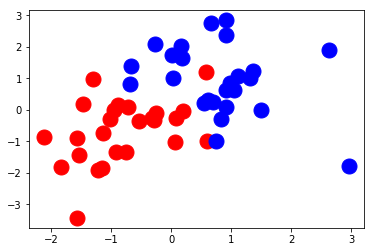

In [140]:
import matplotlib.pyplot as plt

sample_x = x[0:50,:]
sample_y = y[0:50]

plt.plot(sample_x[sample_y == 1, 0], sample_x[sample_y == 1, 1], 'o', color='red', markersize=15)
plt.plot(sample_x[sample_y == 0, 0], sample_x[sample_y == 0, 1], 'o', color='blue', markersize=15)

# Use a trained neural network

Suppose we have already trained the neural network. And we have the weights of the neurons. We can use out simple neural network to make predictions, as follow.

In [143]:
w = [-3.00217099, -1.96278325]
def two_layer_nn(x, w):
    yhat = np.zeros((1,x.shape[0]))
    for j in range(x.shape[0]):
        z = x[j, 0]*w[0] + x[j, 1]*w[1]
        yhat[0,j] = 1/(1+np.exp(-z))
    return yhat


yhat = two_layer_nn(x[0:10,:],w)
print("actual, predicted")
for j in range(yhat.shape[1]):
    print(str(y[j]) + ', ' + str(yhat[0,j]))

actual, predicted
1.0, 0.0168351655073
1.0, 0.916206053346
1.0, 0.999396765994
0.0, 0.0114291661025
0.0, 0.00968264102776
0.0, 9.10181083198e-06
0.0, 0.0187262704255
0.0, 0.0321040219337
1.0, 0.818148622659
0.0, 0.00272196597152


How accurate is our neural network? Let's calculate classification accuracy.

In [144]:
yhat = two_layer_nn(x,w)

def accuracy(y, yhat):
    yhat[yhat > 0.5] = 1
    yhat[yhat < 0.5] = 0
    return np.sum(y==yhat)*100/len(y)

print("accuracy = " + str(accuracy(y, yhat)) + ' %')

accuracy = 94.5995652901 %


# What happen if we adjust the weight?

In [151]:
w = [-1, 0.5]
yhat = two_layer_nn(x,w)
print("w=[-1,0], accuracy = " + str(accuracy(y, yhat)) + ' %')

w = [4, -1]
yhat = two_layer_nn(x,w)
print("w=[1,1], accuracy = " + str(accuracy(y, yhat)) + ' %')

w=[-1,0], accuracy = 73.4158167531 %
w=[1,1], accuracy = 16.0173883966 %


# Two-layer neural network fits a linear decision boundary to the data

Let's make a simple plot to show that neural network weights determine the decision boundary of the data.

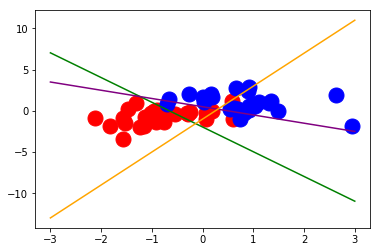

In [162]:
# plotting data
sample_x = x[0:50,:]
sample_y = y[0:50]

plt.plot(sample_x[sample_y == 1, 0], sample_x[sample_y == 1, 1], 'o', color='red', markersize=15)
plt.plot(sample_x[sample_y == 0, 0], sample_x[sample_y == 0, 1], 'o', color='blue', markersize=15)

# plotting decision boundary
def decision_bound(w):
    lin_x = np.linspace(-3.0, 3.0, num=100)
    lin_y = w[1] + w[0]*lin_x
    return lin_x, lin_y

w = [-3.00217099, -1.96278325]
lin_x, lin_y = decision_bound(w)
plt.plot(lin_x, lin_y, color='green')

w = [-1, 0.5]
lin_x, lin_y = decision_bound(w)
plt.plot(lin_x, lin_y, color='purple')

w = [4, -1]
lin_x, lin_y = decision_bound(w)
plt.plot(lin_x, lin_y, color='orange')

